In [2]:
from langchain_core.tools import Tool
from rag import graph
import importlib
importlib.reload(graph)

my_graph = graph.build_graph(Tool(name="retriever_tool",
                         func=lambda x: x,
                         description="retrieve from documents."))

from langchain_teddynote.messages import stream_graph
from langchain_core.runnables import RunnableConfig

inputs = {
    "messages": [
        ("user", "이 채널의 가장 최근 채팅을 세 개 알려줘."),
    ]
}

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=10, configurable={"thread_id": "1"})

stream_graph(my_graph, inputs, config, list(my_graph.nodes.keys()))


=== NODE: question ===



OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

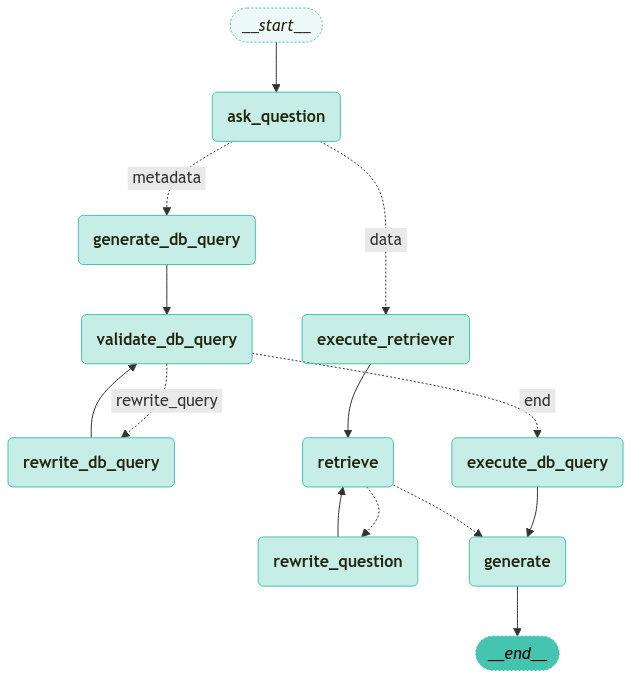

In [23]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(my_graph)
